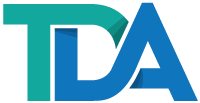
### <span style='color:BLACK'>  <span style='font-family:"Arial"'> DATA VIEWER </span>
###### <span style='color:BLACK'> <span style='font-family:"Arial"'>Updated 02-22-22 - Brandon Gushlaw.</span>



In [54]:
from IPython.display import HTML
from IPython.display import display
from ipyfilechooser import FileChooser

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

from pathlib import Path
import pandas as pd
import sys
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
from IPython.display import clear_output
import ipywidgets 
from ipywidgets import widgets
import os.path



%matplotlib inline
%matplotlib widget 

pf=pd.DataFrame(columns=["Empty"])
pf2=pd.DataFrame(columns=["Empty"])
tf=pf

fc = FileChooser('')
print("Select Folder Location")
display(fc)
# # Switch to folder-only mode
fc.show_only_dirs = False

layout = widgets.Layout(width='auto', height='40px') #set width and height

tab = widgets.Tab()    
out = widgets.Output(layout={'border': '1px solid black'})
# out.layout.width='1000px'
# out.layout.height='1000px'
up = widgets.FileUpload( multiple=True, description="files<1000kb, all types", layout=layout)
up2 = widgets.FileUpload(accept="", multiple=True)

UploadLarge = widgets.Button(description="files>1000kb only CSVs",
                        button_style='primary',
                            layout=layout)

button = widgets.Button(description="Plot data")
button2 = widgets.Button(description="Add Y1",
                        button_style='primary')
button3 = widgets.Button(description="Remove Y1")
button4 = widgets.Button(description="Preview")
button5 = widgets.Button(description="Add Y2",
                        button_style='primary')
button6 = widgets.Button(description="Remove Y2")
CropData = widgets.Button(description="Crop",
                         button_style='warning')
Export = widgets.Button(description="Export")
Reset = widgets.Button(description="Reset",
                     button_style='danger',)
UpdateFormat = widgets.Button(description="Range Format",
                        button_style='info',)

FormatCrop=widgets.HTML(
    value=":Empty",
    placeholder=':Load Data',
    description='',
)

NaNFillValue=widgets.FloatText(
    value=0,
    description='Value Fill:',
    disabled=False
)

DataFileName=widgets.Text(
    value='',
    placeholder='FileName',
    description='FileName:',
    disabled=False
)

CropStart=widgets.Text(
    value='',
    placeholder='Type start range',
    description='Start:',
    disabled=False
)

CropEnd=widgets.Text(
    value='',
    placeholder='Type end Range',
    description='End:',
    disabled=False
)

Select=widgets.Select(
    options=list(tf),
    value=list(tf)[0],
    rows=10,
    description='Data',
    disabled=False
)

Select2=widgets.Select(
    options=list(pf),
    value=list(pf)[0],
    rows=10,
    description='Y-Axis',
    disabled=False
)

Select3=widgets.Select(
    options=list(pf2),
    value=list(pf2)[0],
    rows=10,
    description='Y-Axis2',
    disabled=False
)

NaNFill = widgets.RadioButtons(
    options=['None','Back Fill', 'Forward Fill', 'Mean Fill','Value Fill'],
    description='NaN Handle: ',
    disabled=False
)

SortType = widgets.RadioButtons(
    options=['None','Col 1', 'Col 1 & Col 2'],
    description='Sort Type: ',
    disabled=False
)

SortOrder = widgets.RadioButtons(
    options=['smallest to largest','largest to smallest'],
    description='Sort Order: ',
    disabled=False
)

FileType = widgets.RadioButtons(
    options=['.csv','.xlsx','.txt'],
    description='File Type: ',
    disabled=False
)

Col1 = widgets.Dropdown(
    options=[''],
    value='',
    description='Col 1:',
    disabled=False,
)

Col2 = widgets.Dropdown(
    options=[''],
    value='',
    description='Col 2:',
    disabled=False,
)

dtType = widgets.RadioButtons(
    options=['None','index per row', 'Sampling Rate'],
    description='dt Type: ',
    disabled=False
)

SamplingValue=widgets.FloatText(
    value=1,
    description='Sampling Rate:',
    disabled=False
)

delim = widgets.RadioButtons(
    options=[';', ',', ' '],
    description='Separator: ',
    disabled=False
)

eraser = widgets.SelectMultiple(
    options=['tab','"'],
    value=['tab'],
    #rows=10,
    description='Eraser: ',
    disabled=False
)

rows = widgets.IntSlider(
    value=0,
    step=1,
    description='# of lines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

button_upload = widgets.Button(
    description='Upload',
    disabled=False,
    button_style='warning',
    tooltip='Click to Upload',
    icon='check'
)


button_preview = widgets.Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to Preview',
    icon='search'
)

button_plot = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='danger',
    tooltip='Click to Plot',
    icon='pencil'
)

graph_type = widgets.Dropdown(
    options=['line','scatter','bar','barh','hist','box','kde','density','area','pie','hexbin'],
    value='line',
    description='Chart Type:',
    disabled=False,
)

legend_type = widgets.Dropdown(
    options=['none','upper right','upper left','center','lower left','lower right'],
    value='upper left',
    description='Legend Type:',
    disabled=False,
)

x_axis = widgets.Dropdown(
    options=[''],
    value='',
    description='X-Axis:',
    disabled=False,
)

y_axis = widgets.Dropdown(
    options=[''],
    value='',
    description='Y-Axis:',
    disabled=False,
)

color_picker = widgets.ColorPicker(
    concise=False,
    description='Color Picker: ',
    value='lightblue',
    disabled=False
)

toggle = widgets.ToggleButtons(
    options=['Preview  ', 'Info  ', 'Stats  '],
    description='Options',
    disabled=False,
    button_style='warning',
)

StatsTEXT=widgets.ToggleButton(
    value=False,
    description='In Development',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

EngineerTEXT=widgets.ToggleButton(
    value=False,
    description='In Development',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)





def content_parser(i):
    if up.value == {}:
        with out:
            print('No CSV loaded')    
    else:
        typ, content = "", ""
        up_value = up.value
#         for i in up_value.keys():
#             typ = up_value[i]["metadata"]["type"]
            
        content = up.value[up.metadata[i]['name']]['content']
        content_str = str(content, 'utf-8')

        if eraser.value != {}: 
            for val in eraser.value:
                if val == "tab":
                     content_str = content_str.replace("\t","")
                else:
                    content_str = content_str.replace(val,"")
        if content_str != "":
            str_io = StringIO(content_str) 
            return str_io

            
def df_converter():
#     df=pd.DataFrame()
    ContentFault=False
    newpath=fc.selected_path
    files_in_directory = os.listdir(newpath)
    if FileType.value=='.csv'or FileType.value=='.txt':
        filtered_files = [file for file in files_in_directory if file.endswith(FileType.value)]
        NumOfFiles=len(filtered_files)
        df=pd.DataFrame([])
        if NumOfFiles<1:
            print("Wrong data format or no data uploaded")
        else:
            print("Parsing:",NumOfFiles, 'Files')
            for file in filtered_files:
                print(newpath+str("\\")+file)
                hf=pd.read_csv(newpath+str("\\")+file, sep=delim.value, index_col=False, skiprows=rows.value)
                df=pd.concat([df, hf], ignore_index=True)




            if ContentFault==False:
                df = NaNFillFrame(df)
                Col1.options = df.columns
                Col2.options = df.columns
                df=SortFrame(df)
                df=df.reset_index(drop=True)
                df=dtFrame(df)
                return df
            else:
                return None
    else:
        filtered_files = [file for file in files_in_directory if file.endswith(".xlsx")]
        NumOfFiles=len(filtered_files)
        df=pd.DataFrame([])
        if NumOfFiles<1:
            print("Wrong data format or no data uploaded")
        else:
            print("Parsing:",NumOfFiles, 'Files')
            for file in filtered_files:
                print(newpath+str("\\")+file)
                hf=pd.read_excel(newpath+str("\\")+file)
                df=pd.concat([df, hf], ignore_index=True)




            if ContentFault==False:
                df = NaNFillFrame(df)
                Col1.options = df.columns
                Col2.options = df.columns
                df=SortFrame(df)
                df=df.reset_index(drop=True)
                df=dtFrame(df)
                return df
            else:
                return None
def preview():
    global dftype
   
    df = df_converter()   
        
    with out:
        out.clear_output()
        print('\n -----Now this is how your DF looks like:----- \n')
        if df is not None:
            print(df.head(10))
        else:
            print('Configuration is wrong/missing...1')
            
def upload():
    global tf
    global df
    global pf
    global pf2
    global dftype
    

    df = df_converter()
    tf=df
    with out:
        out.clear_output()
        print('\n --------Your uploaded DF looks like:-------- \n')
        if df is not None:
            print(df)
            x_axis.options = df.columns
            y_axis.options = df.columns
            pf=pd.DataFrame(columns=["Empty"])
            pf2=pd.DataFrame(columns=["Empty"])
            Select.options=list(df)
            Select2.options=list(pf)
            Select3.options=list(pf2)
            
        else:
            print('Configuration is wrong/missing...2')
def desc():
    info_level = toggle.value
    if info_level != {}:
        df = df_converter()
        with out:
            out.clear_output()
            print('\n ------Your {} looks like:------ \n'.format(
                info_level))
            if df is not None:
                if info_level == 'Info  ':
                    print(df.info(verbose=True))
                elif info_level == 'Stats  ':
                    print(df.describe())
                elif info_level == 'Preview  ':
                    print(df.head(5))
                else:
                    print('Configuration is wrong/missing...')
    
    
def plot():
    global pf
    global pf2
    global df
    global dftype
    
    graph = graph_type.value
    if graph != {}:
        #df = df_converter()
        with out:
            out.clear_output()
            print('\n ------Your {} looks like:------ \n'.format(
                graph))
            if (df is not None):
                if x_axis.value in pf:
                        DROP=x_axis.value
                        tf[DROP]=pf[DROP]
                        pf=pf.drop(columns=[DROP])
                        Select.options=list(tf)
                        Select2.options=list(pf)
                if x_axis.value in pf2:
                        DROP=x_axis.value
                        tf[DROP]=pf2[DROP]
                        pf2=pf2.drop(columns=[DROP])
                        Select.options=list(tf)
                        Select3.options=list(pf2)
                        
                if pf2.empty==True and pf.empty==False:
                        print('plotted single Y axis')
                        df.plot(kind=graph,x=x_axis.value,y=list(pf.columns),legend=True);
                        plt.legend(list(pf.columns),loc=legend_type.value)
                        
                elif pf2.empty==False and pf.empty==False:
                    print('plotted secondary Y axis')
                    fig, ax1 = plt.subplots(1,1)
                    df.plot(ax=ax1,kind=graph,x=x_axis.value,y=list(pf.columns),legend=False);
                    ax2 = ax1.twinx()
                    df.plot(ax=ax2,kind=graph,x=x_axis.value,y=list(pf2.columns),secondary_y=True, legend=False);
#                     df[list(pf.columns)].plot(ax=ax1,kind=graph_type.value,x=x_axis.value,legend=False);
#                     ax2 = ax1.twinx()
#                     df[list(pf2.columns)].plot(ax=ax2,kind=graph_type.value,x=x_axis.value,secondary_y=True, legend=False);
                    ax1.set_ylabel('A scale')
                    ax2.right_ax.set_ylabel('BC scale')

                    h1, l1 = ax1.get_legend_handles_labels()
                    h2, l2 = ax2.right_ax.get_legend_handles_labels()
                    ax1.legend(h1+h2, l1+l2,loc=legend_type.value)
#                     ax1.legend((list(pf.columns)+list(pf2.columns)),loc=legend_type.value)
                    ax1.set_zorder(1)
                    ax1.patch.set_visible(False)
                    
                elif pf2.empty==True and pf.empty==True:
                    print("No data loading into the Y axis")

             
    
    

def add_clicked(b):
    global tf
    global pf
    ADD=Select.value
    pf[ADD]=tf[ADD]
    tf=tf.drop(columns=[ADD])
    if "Empty" in pf:
        pf=pf.drop(columns=["Empty"])
    
    Select.options=list(tf)
    Select2.options=list(pf)

    with out: 
        print("Added")
        
def drop_clicked(b):
    global tf
    global pf
    DROP=Select2.value
    tf[DROP]=pf[DROP]
    pf=pf.drop(columns=[DROP])
    Select.options=list(tf)
    Select2.options=list(pf)
    
def add_clicked2(b):
    global tf
    global pf2
    ADD=Select.value
    pf2[ADD]=tf[ADD]
    tf=tf.drop(columns=[ADD])
    if "Empty" in pf2:
        pf2=pf2.drop(columns=["Empty"])
        
    Select.options=list(tf)
    Select3.options=list(pf2)

    with out: 
        print("Added")
        
def drop_clicked2(b):
    global tf
    global pf2
    DROP=Select3.value
    tf[DROP]=pf2[DROP]
    pf2=pf2.drop(columns=[DROP])
    Select.options=list(tf)
    Select3.options=list(pf2)  
   
    with out:
        print("dropped")
def crop():
    global df
    if df[x_axis.value].dtypes=='float':
        start=float(CropStart.value)
        end=float(CropEnd.value)
        Start_data=df.iloc[(df[x_axis.value]-start).abs().argsort()[:1]].index.tolist()[0]
        End_data=df.iloc[(df[x_axis.value]-end).abs().argsort()[:1]].index.tolist()[0]
    
    if df[x_axis.value].dtypes=='object':
        start=str(CropStart.value)
        end=str(CropEnd.value)
        Start_data=df[df[x_axis.value]==start].first_valid_index()
        End_data=df[df[x_axis.value]==end].first_valid_index()
    
    if df[x_axis.value].dtypes=='int64':
        Start=int(CropStart.value)
        End=int(CropEnd.value)
        Start_data=df.iloc[(df[x_axis.value]-start).abs().argsort()[:1]].index.tolist()[0]
        End_data=df.iloc[(df[x_axis.value]-end).abs().argsort()[:1]].index.tolist()[0]
        
    df=df.iloc[Start_data:End_data]

def NaNFillFrame(df):
    if NaNFill.value=='Back Fill':
        df=df.fillna(method="bfill")
        df=df.fillna(method="ffill")   
    if NaNFill.value=='Forward Fill':
        df=df.fillna(method="ffill")
        df=df.fillna(method="bfill")
    if NaNFill.value=='Mean Fill':
        value=df.mean(axis=0,skipna=True)
        df=df.fillna(value=value)
    if NaNFill.value=='Value Fill':
        value=NaNFillValue.value
        df=df.fillna(value=value)
    
    return df

def SortFrame(df):
    if SortOrder.value=='largest to smallest':
        value=False
    else:
        value=True
    if SortType.value=='Col 1':
        df=df.sort_values(by=Col1.value,ascending=value)  
    if SortType.value=='Col 1 & Col 2':
        df=df.sort_values(by=[Col1.value,Col2.value],ascending=value)
    return df

def dtFrame(dtf):
    
    if dtType.value=='index per row':
        dtf['dt']=pd.Series(np.linspace(0,(len(dtf)),(len(dtf)+1)))
        df=dtf.insert(0, 'dt', dtf.pop('dt'))
    if dtType.value=='Sampling Rate':
        dtf['dt']=pd.Series(np.linspace(0,(len(dtf)),(len(dtf)+1)))*SamplingValue.value
        df=dtf.insert(0, 'dt', dtf.pop('dt'))
        
    return dtf
        
def preview_clicked(b):
    preview()
def upload_clicked(b):
    dftype=1
    upload()
def desc_clicked(b):
    desc()
def plotter_clicked(b):
    plot()
def crop_clicked(b):
    crop()
def format_clicked(b):
    FormatCrop.value=str(df[x_axis.value][0])
def export_clicked(b):
    
    #df.to_csv("DataResults.CSV",index=0)
#     compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
#     df.to_csv('out.zip', index=False,
#           compression=compression_opts)
    print('Exported to' + fc.selected_path)
    downloads_path = str(Path.home() / "Downloads")
    df.to_csv(fc.selected_path + str("\\")+str(DataFileName.value)+str('.csv'), index = False)
    
def reset_clicked(b):
    upload()
    

    
button_preview.on_click(preview_clicked)
button_upload.on_click(upload_clicked)
toggle.observe(desc_clicked, 'value')
button_plot.on_click(plotter_clicked)
button2.on_click(add_clicked)
button3.on_click(drop_clicked)
button5.on_click(add_clicked2)
button6.on_click(drop_clicked2)
CropData.on_click(crop_clicked)
UpdateFormat.on_click(format_clicked)
Export.on_click(export_clicked)
Reset.on_click(reset_clicked)
UploadLarge.on_click(uploadlarge_clicked)

accordion = widgets.Accordion(children=[
    widgets.HBox([FileType]), 
    widgets.VBox([delim, eraser]), 
    rows,widgets.VBox([NaNFill,NaNFillValue]),
    widgets.VBox([widgets.HBox([SortType,Col1,Col2]),SortOrder]),
    widgets.VBox([dtType,SamplingValue])])

accordion.set_title(0, 'File Selection')
accordion.set_title(1, 'Delimiter')
accordion.set_title(2, 'Skip Rows')
accordion.set_title(3, 'NaN Columns')
accordion.set_title(4, 'Sort')
accordion.set_title(5, 'Sampling Index')

accordion2 = widgets.Accordion(children=[
    up2, 
    widgets.VBox([delim, eraser]), 
    rows])



accordion_box = widgets.VBox([
    accordion, 
    widgets.HBox([button_preview, button_upload]),
    out
])



children = [
    accordion_box, 
    widgets.VBox([toggle, out]),
    widgets.VBox([
        widgets.HBox([graph_type,x_axis,legend_type]),
        widgets.HBox([UpdateFormat,FormatCrop]),
        widgets.HBox([CropStart,CropEnd,CropData,Export,Reset]),
        widgets.HBox([button2,button3,button5,button6,DataFileName]),
        widgets.HBox([Select,Select2,Select3]), 
        button_plot,
        out]),
    StatsTEXT,
    EngineerTEXT]



tab.children = children
tab.set_title(0, "Upload")
tab.set_title(1, "Describer")
tab.set_title(2, "Plotter")
tab.set_title(3, "Stats tools")
tab.set_title(4, "Engineer tools")
tab

Select Folder Location


FileChooser(path='C:\Users\bgushlaw\TDA Intro to Python', filename='', title='', show_hidden=False, select_des…

Parsing: 3 Files
C:\Users\bgushlaw\Desktop\newdata\2021-12-0809-51RawData.csv
C:\Users\bgushlaw\Desktop\newdata\2021-12-0809-55RawData.csv
C:\Users\bgushlaw\Desktop\newdata\youknowforsure.csv
Wrong data format or no data uploaded
Parsing: 3 Files
C:\Users\bgushlaw\Desktop\newdata\2021-12-0809-51RawData.csv
C:\Users\bgushlaw\Desktop\newdata\2021-12-0809-55RawData.csv
C:\Users\bgushlaw\Desktop\newdata\youknowforsure.csv
